In [4]:
! poetry install

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: dialogue2graph (0.1.0)


## Generate synthetic data on a given topic

Use `LoopedGraphGenerator` to create a validated graph from several LLM generated dialogues concerning a given topic

In [2]:
import os
import json
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator
from dialogue2graph import Dialogue, Graph

load_dotenv()

True

1. Choose LLMs for dialogue generation and dialogue validation

In [3]:
gen_model = ChatOpenAI(
    model='o1-mini',
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL")
)
val_model = ChatOpenAI(
    model='gpt-3.5-turbo',
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL"),
    temperature=0
)

2. Create `LoopedGraphGenerator` and use `invoke` method to get a dialogue graph

In [4]:
gen = LoopedGraphGenerator(
    generation_model=gen_model,
    validation_model=val_model,
)

In [5]:
generated_graph = gen.invoke(topic='travel booking')


Generating graph for topic: travel booking
Generating Graph ...


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"



🔍 Checking graph requirements...
🔄 Found 6 cycles in the graph:
Cycle 1: 1 -> 2 -> 1
Cycle 2: 2 -> 3 -> 2
Cycle 3: 3 -> 4 -> 3
Cycle 4: 4 -> 5 -> 4
Cycle 5: 5 -> 6 -> 5
Cycle 6: 5 -> 7 -> 5
✅ Graph meets cycle requirements
Sampling dialogues...
1 repeats works!
Sampled 12 dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Validating and fixing transitions...
Validating initial graph


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/o

✅ Successfully generated graph for travel booking


3. Save result as a `Graph` instance and visualise it

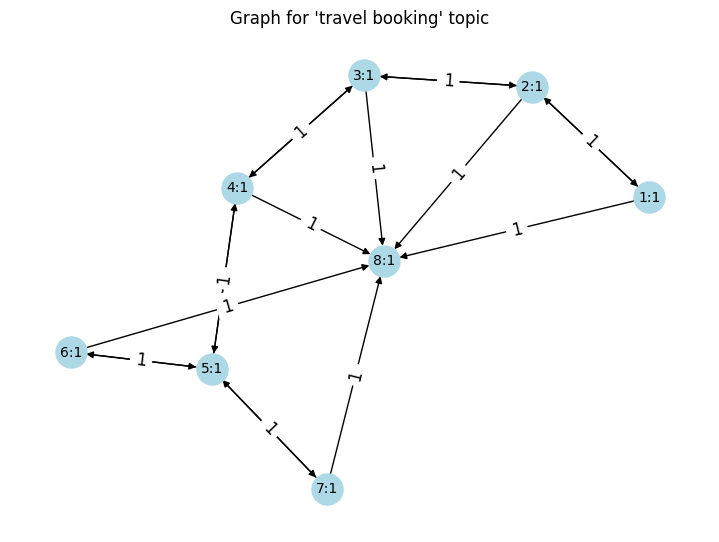

In [6]:
graph = Graph(generated_graph[0]['graph'])
graph.visualise_short("Graph for 'travel booking' topic")